In [2]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
base_dir = r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats"
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

In [5]:
def load_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (150, 150))
            images.append(img)
            labels.append(label)
    return images, labels

In [6]:
cat_images, cat_labels = load_images(cat_dir, 0)
dog_images, dog_labels = load_images(dog_dir, 1)

In [7]:
images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 109s 810ms/step - accuracy: 0.5128 - loss: 38.9123 - val_accuracy: 0.5190 - val_loss: 0.6925
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.5242 - loss: 0.6918 - val_accuracy: 0.5260 - val_loss: 0.6899
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 879ms/step - accuracy: 0.5142 - loss: 0.6890 - val_accuracy: 0.5100 - val_loss: 0.6918
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 102s 794ms/step - accuracy: 0.5281 - loss: 0.6913 - val_accuracy: 0.5140 - val_loss: 0.6906
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 110s 859ms/step - accuracy: 0.5192 - loss: 0.6932 - val_accuracy: 0.5070 - val_loss: 0.6920
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 104s 810ms/step - accuracy: 0.4969 - loss: 0.6920 - val_accuracy: 0.5070 - val_loss: 0.6928
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 101s 788ms/step - accuracy: 0.5084 - loss: 0.6928 - val_accuracy: 0.5050 - val_loss: 0.6953
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 103s 802ms/step - accuracy: 0.5066 - loss: 0.6931

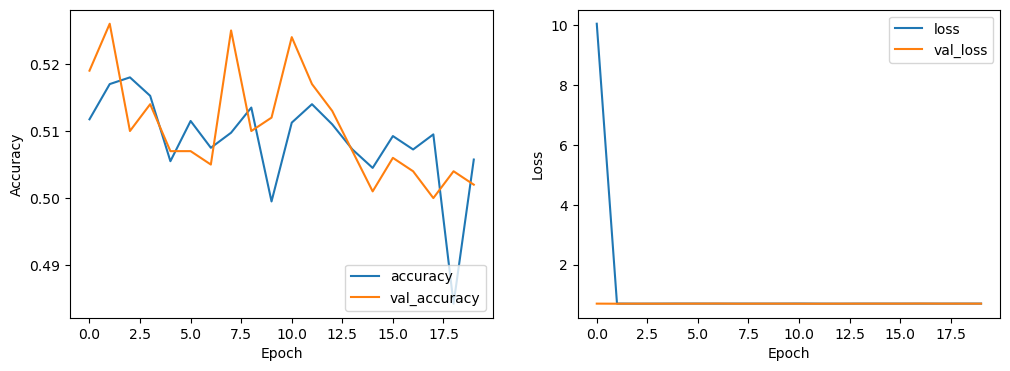

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [15]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize

    prediction = model.predict(img)
    return 'Dog' if prediction[0][0] > 0.5 else 'Cat'

In [16]:
# Example usage
result = predict_image(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\cats\cat.10.jpg")  # Update with your test image path
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
The image is classified as: Cat


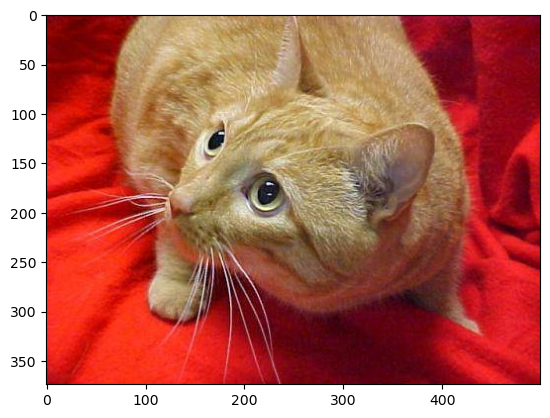

In [18]:
test_cat=cv2.imread(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of cat.18.jpg")
test_cat=cv2.cvtColor(test_cat,cv2.COLOR_BGR2RGB)
plt.imshow(test_cat)

In [19]:
result = predict_image(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of dog.30.jpg")  # Update with your test image path
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The image is classified as: Cat


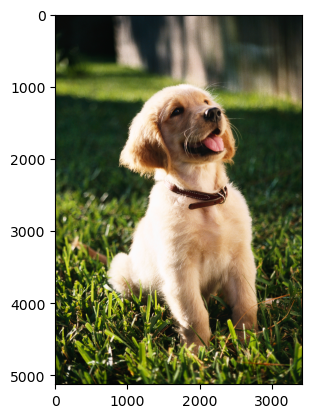

In [ ]:
test_dog=cv2.imread(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog.jpg')
test_dog=cv2.cvtColor(test_dog,cv2.COLOR_BGR2RGB)
plt.imshow(test_dog)

In [23]:
result = predict_image(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of cat.42.jpg")  # Update with your test image path
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The image is classified as: Cat


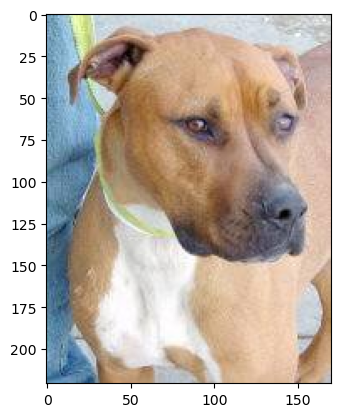

In [21]:
test_dog2=cv2.imread(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of dog.105.jpg")
test_dog2=cv2.cvtColor(test_dog2,cv2.COLOR_BGR2RGB)
plt.imshow(test_dog2)

In [24]:
result = predict_image(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of dog.104.jpg")  # Update with your test image path
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The image is classified as: Cat


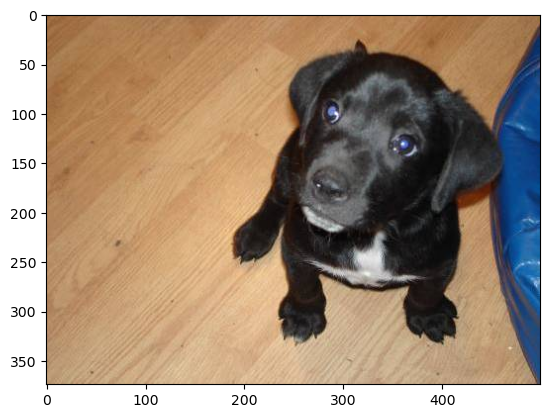

In [25]:
test_dog3=cv2.imread(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of dog.112.jpg")
test_dog3=cv2.cvtColor(test_dog3,cv2.COLOR_BGR2RGB)
plt.imshow(test_dog3)

In [27]:
result = predict_image(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of cat.54.jpg")  # Update with your test image path
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The image is classified as: Cat


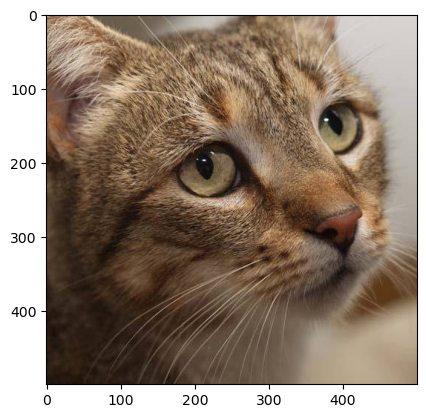

In [28]:
test_cat2=cv2.imread(r"C:\Users\hp\Documents\DOGandCAT\dogs_vs_cats\test\Copy of cat.54.jpg")
test_cat2=cv2.cvtColor(test_cat2,cv2.COLOR_BGR2RGB)
plt.imshow(test_cat2)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step


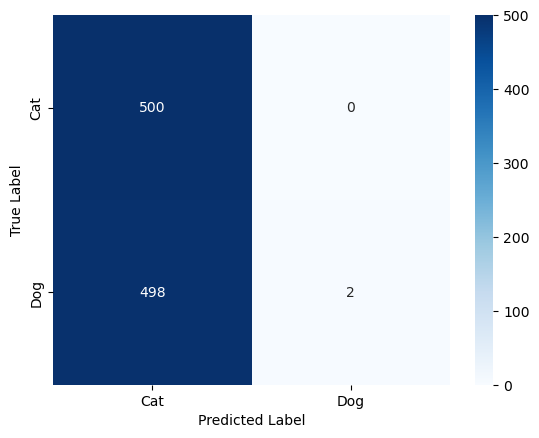

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()